In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import pdb
import glob
import itertools
from utils import constants as cnst
from wavelet import util, wav
from scipy.ndimage.measurements import label
from scipy import ndimage
from utils import u_arrays as ua, u_plot, u_statistics as u_stat
import ipdb

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [3]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [5]:
msg_file = '/home/ck/DIR/cornkle/MCSfiles/VERAblobs/coresPower_MSG_-40_15000km2_-50points_dominant_2006_07.nc'

In [6]:
ar_msg = xr.open_dataset(msg_file)

In [7]:
ar_msg

<xarray.Dataset>
Dimensions:  (lat: 386, lon: 690, time: 67)
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 20.72 20.76 20.8 20.84
  * lon      (lon) float64 -17.98 -17.93 -17.89 -17.84 ... 12.88 12.92 12.97
  * time     (time) datetime64[ns] 2006-07-01T08:30:00 ... 2006-07-02T17:30:00
Data variables:
    blobs    (time, lat, lon) int16 ...
    tir      (time, lat, lon) int16 ...
Attributes:
    radii:              [3 4 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  28.0

In [12]:
oneday = ar_msg.isel(time=5)

In [14]:
oneday = oneday.sel(lat=slice(5,17), lon=slice(-11,12))

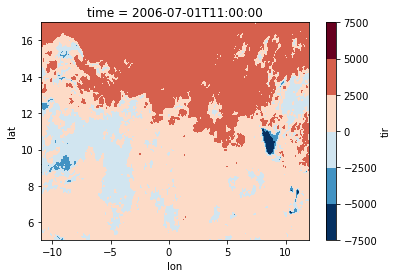

In [16]:
oneday['tir'].plot.contourf()

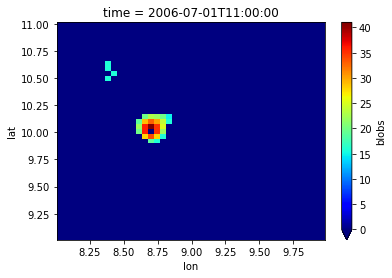

In [27]:
oneday['blobs'].sel(lon=slice(8,10),lat=slice(9,11)).plot.pcolormesh(cmap='jet', vmin=0)

In [48]:
data = oneday['blobs'].values
tir = oneday['tir'].values/100
labels, numL = label(data)

In [49]:
u, inv = np.unique(labels, return_inverse=True)
n = np.bincount(inv)

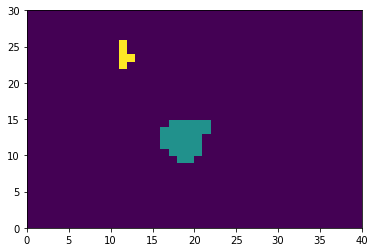

In [50]:
plt.pcolormesh(labels[100:150,400:500][0:30,20:60])

In [51]:
tgrad = []
for ins in u:
    if ins == 0:
        continue
    print(ins)
    pos = np.where(labels==ins)
    
    diff = np.max(tir[pos]) - np.min(tir[pos])
    tgrad.append(diff)    

1
2


In [52]:
tgrad

[10.869999999999997, 4.170000000000002]

In [55]:
tgrad = []
ar_msg = xr.open_dataset(msg_file)

for time in ar_msg.time:
    oneday = ar_msg.sel(time=time)
    print(oneday.time)
    data = oneday['blobs'].values
    tir = oneday['tir'].values/100
    labels, numL = label(data)
    u, inv = np.unique(labels, return_inverse=True)
    n = np.bincount(inv)
    for ins in u:
        if ins == 0:
            continue
        print(ins)
        pos = np.where(labels==ins)

        diff = np.max(tir[pos]) - np.min(tir[pos])
        tgrad.append(diff)    

<xarray.DataArray 'time' ()>
array('2006-07-01T08:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-01T08:30:00
1
2
3
<xarray.DataArray 'time' ()>
array('2006-07-01T09:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-01T09:00:00
1
2
3
4
<xarray.DataArray 'time' ()>
array('2006-07-01T09:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-01T09:30:00
1
2
3
4
<xarray.DataArray 'time' ()>
array('2006-07-01T10:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-01T10:00:00
1
2
3
4
<xarray.DataArray 'time' ()>
array('2006-07-01T10:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-01T10:30:00
1
2
3
4
<xarray.DataArray 'time' ()>
array('2006-07-01T11:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-01T11:00:00
1
2
3
4
5
<xarray.DataArray 'time' ()>
array

1
2
3
<xarray.DataArray 'time' ()>
array('2006-07-02T09:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-02T09:30:00
1
2
3
4
5
<xarray.DataArray 'time' ()>
array('2006-07-02T10:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-02T10:00:00
1
2
3
4
<xarray.DataArray 'time' ()>
array('2006-07-02T10:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-02T10:30:00
1
2
3
<xarray.DataArray 'time' ()>
array('2006-07-02T11:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-02T11:00:00
1
2
3
<xarray.DataArray 'time' ()>
array('2006-07-02T11:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-02T11:30:00
1
2
3
<xarray.DataArray 'time' ()>
array('2006-07-02T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-07-02T12:00:00
1
2
3
<xarray.DataArray 'time' ()>
array

(array([ 99., 132., 115., 113.,  79.,  35.,  17.,   9.,   9.,   6.]),
 array([ 0.   ,  3.234,  6.468,  9.702, 12.936, 16.17 , 19.404, 22.638,
        25.872, 29.106, 32.34 ]),
 <a list of 10 Patch objects>)

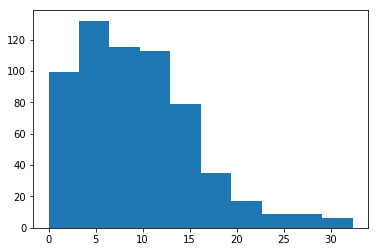

In [58]:
plt.hist(tgrad, bins=10)

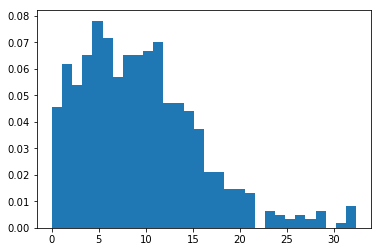

In [72]:
f = plt.figure()
ax = f.add_subplot(111)
u_plot.hist_freq(ax,tgrad, bins=30)


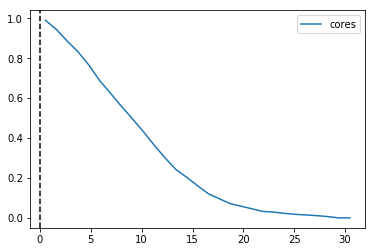

In [71]:
bins = np.linspace(0,31,30)
nbpoint, pointcount, bins = u_stat.histo_frequency(tgrad, bins=bins)

bincentre = bins[0:-1] + (bins[1::]-bins[0:-1])/2
                                                   

cumulative = np.cumsum(nbpoint[::-1])[::-1]

ax = f.add_subplot(122)
plt.plot(bincentre,cumulative, label='cores')

plt.axvline(0,ymin=0, ymax=1, linestyle='dashed', color='k')
plt.legend()                                                   